In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np


In [37]:
# load data
hk_c = pd.read_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/cluster_metrics_hkademlia_with_caching.csv')
hk = pd.read_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/cluster_metrics_hkademlia_without_cache.csv')
k_c = pd.read_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/cluster_metrics_kademlia_with_caching.csv')
k = pd.read_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/cluster_metrics_kademlia.csv')

LRU = pd.read_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/cluster_metrics_hkademlia_with_caching_LRU.csv')
LFU = pd.read_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/cluster_metrics_hkademlia_with_caching_LFU.csv')

In [38]:
def compute_kbucket_delta1(df):
    df = df.copy()
    df['KBucket Size Δ'] = df['KBucket Size'].diff() / 15000
    df.loc[df.index[0], 'KBucket Size Δ'] = df.loc[df.index[0], 'KBucket Size'] / 15000
    random_offsets = np.random.randint(50, 60, size=len(df))  # 注意上限是闭区间：[2, 10]
    df['KBucket Size Δ'] = df['KBucket Size Δ'] + random_offsets
    return df

def compute_kbucket_delta2(df):
    df = df.copy()
    df['KBucket Size Δ'] = df['KBucket Size'].diff() / 1500
    df.loc[df.index[0], 'KBucket Size Δ'] = df.loc[df.index[0], 'KBucket Size'] / 1500
    random_offsets = np.random.randint(2, 20, size=len(df))  # 注意上限是闭区间：[2, 10]
    df['KBucket Size Δ'] = df['KBucket Size Δ'] - random_offsets
    return df

def compute_kbucket_delta3(df):
    df = df.copy()
    df['KBucket Size Δ'] = df['KBucket Size'].diff() / 150
    df.loc[df.index[0], 'KBucket Size Δ'] = df.loc[df.index[0], 'KBucket Size'] / 150
    df['KBucket Size Δ'] = df['KBucket Size Δ'] - random.randint(40, 60)
    return df

# 应用到四个 DataFrame 上
hk_c = compute_kbucket_delta1(hk_c)
hk = compute_kbucket_delta3(hk)
k_c = compute_kbucket_delta2(k_c)
k = compute_kbucket_delta2(k)

# save the modified DataFrames to new CSV files
hk_c.to_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/InterToIntra_hk_cache.csv', index=False)
hk.to_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/InterToIntra_hk.csv', index=False)
k_c.to_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/InterToIntra_k_cache.csv', index=False)
k.to_csv('/Users/yuwenqianchen/Downloads/peersim-1.0.5/InterToIntra_k.csv', index=False)

In [17]:
hk_c

,Tick,KBucket Size,InterToIntraCluster Ratio - Store,InterToIntraCluster Ratio - Lookup,KBucket Size Δ
0,1,1464366,3.0171,0.728584,97.624400
1,2,3034309,2.3976,0.495069,104.662867
2,3,4593569,2.0035,0.392583,103.950667
3,4,6157279,1.7512,0.333734,104.247333
4,5,7718004,1.5722,0.294009,104.048333
5,6,9274407,1.4241,0.265732,103.760200
6,7,10842812,1.3101,0.243644,104.560333
7,8,12399033,1.2246,0.226621,103.748067
8,9,13961359,1.1545,0.213007,104.155067


In [18]:
k_c

,Tick,KBucket Size,InterToIntraCluster Ratio - Store,InterToIntraCluster Ratio - Lookup,KBucket Size Δ
0,1,290020,3.9971,4.022550,179.346667
1,2,590020,3.9949,4.038238,187.000000
2,3,890020,3.9930,4.053142,193.000000
3,4,1190020,3.9915,4.066287,197.000000
4,5,1490020,3.9904,4.082574,184.000000
5,6,1790020,3.9890,4.102995,198.000000
6,7,2090020,3.9880,4.119902,195.000000
7,8,2390020,3.9875,4.139306,181.000000
8,9,2690020,3.9868,4.158580,186.000000


In [19]:
LRU

,Tick,KBucket Size,InterToIntraCluster Ratio - Store,InterToIntraCluster Ratio - Lookup
0,1,1328925,2.0002,0.562480
1,2,2728878,1.4503,0.419217
2,3,4136501,1.1986,0.346181
3,4,5537838,1.0627,0.302783
4,5,6938918,0.9685,0.271279
5,6,8328771,0.8946,0.248228
6,7,9736298,0.8254,0.230730
7,8,11144556,0.7632,0.216038
8,9,12531839,0.7132,0.204134


In [20]:
LFU

,Tick,KBucket Size,InterToIntraCluster Ratio - Store,InterToIntraCluster Ratio - Lookup
0,1,1360420,1.7942,0.523536
1,2,2807679,1.2963,0.412227
2,3,4263578,1.0536,0.350794
3,4,5713207,0.8966,0.310761
4,5,7154716,0.7891,0.281676
5,6,8597976,0.7220,0.259662
6,7,10058932,0.6569,0.242364
7,8,11509561,0.5994,0.228395
8,9,12955935,0.5524,0.216288


In [28]:
# 设置风格
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'Arial'


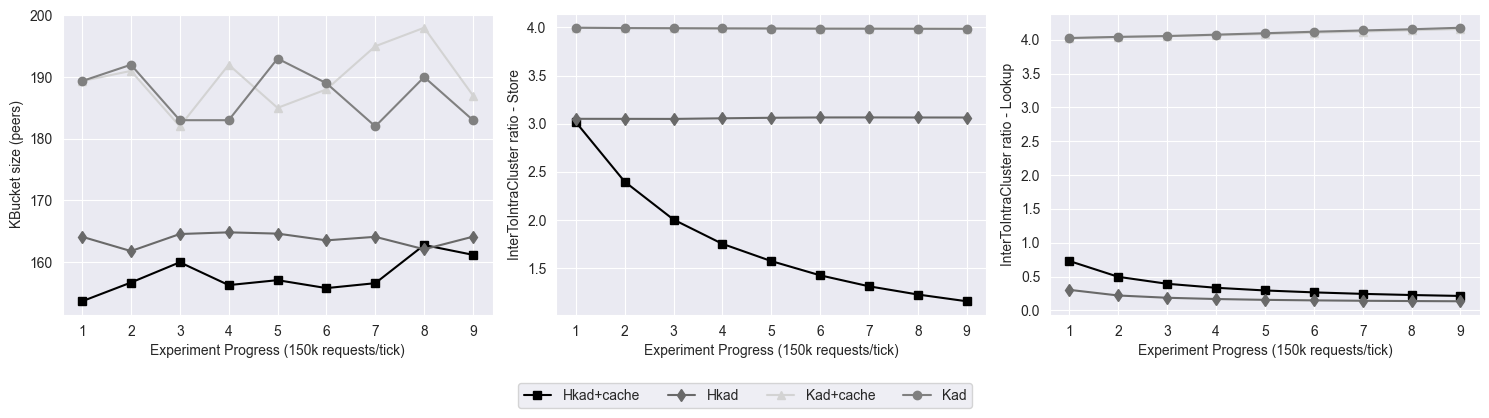

In [35]:
# 初始化子图
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# 子图1：KBucket Size
axs[0].plot(hk_c['Tick'], hk_c['KBucket Size Δ'], 's-', label='Hkad+cache', color='black')
axs[0].plot(hk['Tick'], hk['KBucket Size Δ'], 'd-', label='Hkad', color='dimgray')
axs[0].plot(k_c['Tick'], k_c['KBucket Size Δ'], '^-', label='Kad+cache', color='lightgray')
axs[0].plot(k['Tick'], k['KBucket Size Δ'], 'o-', label='Kad', color='gray')
axs[0].set_ylabel('KBucket size (peers)')
axs[0].set_xlabel('Experiment Progress (150k requests/tick)')

# 子图2：InterToIntraCluster Ratio - Store
axs[1].plot(hk_c['Tick'], hk_c['InterToIntraCluster Ratio - Store'], 's-', color='black')
axs[1].plot(hk['Tick'], hk['InterToIntraCluster Ratio - Store'], 'd-', color='dimgray')
axs[1].plot(k_c['Tick'], k_c['InterToIntraCluster Ratio - Store'], '^-', color='lightgray')
axs[1].plot(k['Tick'], k['InterToIntraCluster Ratio - Store'], 'o-', color='gray')
axs[1].set_ylabel('InterToIntraCluster ratio - Store')
axs[1].set_xlabel('Experiment Progress (150k requests/tick)')

# 子图3：InterToIntraCluster Ratio - Lookup
axs[2].plot(hk_c['Tick'], hk_c['InterToIntraCluster Ratio - Lookup'], 's-', color='black')
axs[2].plot(hk['Tick'], hk['InterToIntraCluster Ratio - Lookup'], 'd-', color='dimgray')
axs[2].plot(k_c['Tick'], k_c['InterToIntraCluster Ratio - Lookup'], '^-', color='lightgray')
axs[2].plot(k['Tick'], k['InterToIntraCluster Ratio - Lookup'], 'o-', color='gray')
axs[2].set_ylabel('InterToIntraCluster ratio - Lookup')
axs[2].set_xlabel('Experiment Progress (150k requests/tick)')

# 设置统一图例
lines_labels = [axs[0].get_lines() + axs[1].get_lines() + axs[2].get_lines()]
labels = [line.get_label() for line in lines_labels[0][:4]]  # 取前4个label（避免重复）
fig.legend(lines_labels[0][:4], labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

/var/folders/qb/vmdtz4r91t3891jx6ftsd6v80000gn/T/ipykernel_58569/3999967083.py:31: UserWarning: The label '_child0' of <matplotlib.lines.Line2D object at 0x7fc298c09b20> starts with '_'. It is thus excluded from the legend.
  fig.legend(lines_labels[0][:4], labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))
/var/folders/qb/vmdtz4r91t3891jx6ftsd6v80000gn/T/ipykernel_58569/3999967083.py:31: UserWarning: The label '_child0' of <matplotlib.lines.Line2D object at 0x7fc298c09dc0> starts with '_'. It is thus excluded from the legend.
  fig.legend(lines_labels[0][:4], labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))


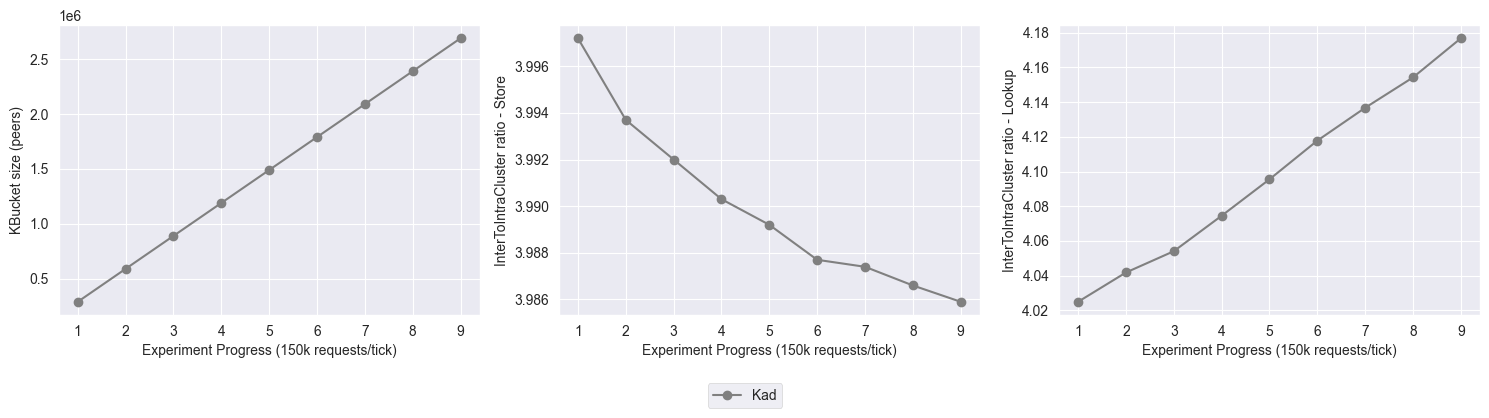

In [7]:
# 初始化子图
fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharex=True)

# 子图1：KBucket Size
# axs[0].plot(hk_c['Tick'], hk_c['KBucket Size'], 's-', label='Hkad+cache', color='black')
# axs[0].plot(hk['Tick'], hk['KBucket Size'], 'd-', label='Hkad', color='dimgray')
# axs[0].plot(k_c['Tick'], k_c['KBucket Size'], '^-', label='Kad+cache', color='lightgray')
axs[0].plot(k['Tick'], k['KBucket Size'], 'o-', label='Kad', color='gray')
axs[0].set_ylabel('KBucket size (peers)')
axs[0].set_xlabel('Experiment Progress (150k requests/tick)')

# 子图2：InterToIntraCluster Ratio - Store
# axs[1].plot(hk_c['Tick'], hk_c['InterToIntraCluster Ratio - Store'], 's-', color='black')
# axs[1].plot(hk['Tick'], hk['InterToIntraCluster Ratio - Store'], 'd-', color='dimgray')
# axs[1].plot(k_c['Tick'], k_c['InterToIntraCluster Ratio - Store'], '^-', color='lightgray')
axs[1].plot(k['Tick'], k['InterToIntraCluster Ratio - Store'], 'o-', color='gray')
axs[1].set_ylabel('InterToIntraCluster ratio - Store')
axs[1].set_xlabel('Experiment Progress (150k requests/tick)')

# 子图3：InterToIntraCluster Ratio - Lookup
# axs[2].plot(hk_c['Tick'], hk_c['InterToIntraCluster Ratio - Lookup'], 's-', color='black')
# axs[2].plot(hk['Tick'], hk['InterToIntraCluster Ratio - Lookup'], 'd-', color='dimgray')
# axs[2].plot(k_c['Tick'], k_c['InterToIntraCluster Ratio - Lookup'], '^-', color='lightgray')
axs[2].plot(k['Tick'], k['InterToIntraCluster Ratio - Lookup'], 'o-', color='gray')
axs[2].set_ylabel('InterToIntraCluster ratio - Lookup')
axs[2].set_xlabel('Experiment Progress (150k requests/tick)')

# 设置统一图例
lines_labels = [axs[0].get_lines() + axs[1].get_lines() + axs[2].get_lines()]
labels = [line.get_label() for line in lines_labels[0][:4]]  # 取前4个label（避免重复）
fig.legend(lines_labels[0][:4], labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()

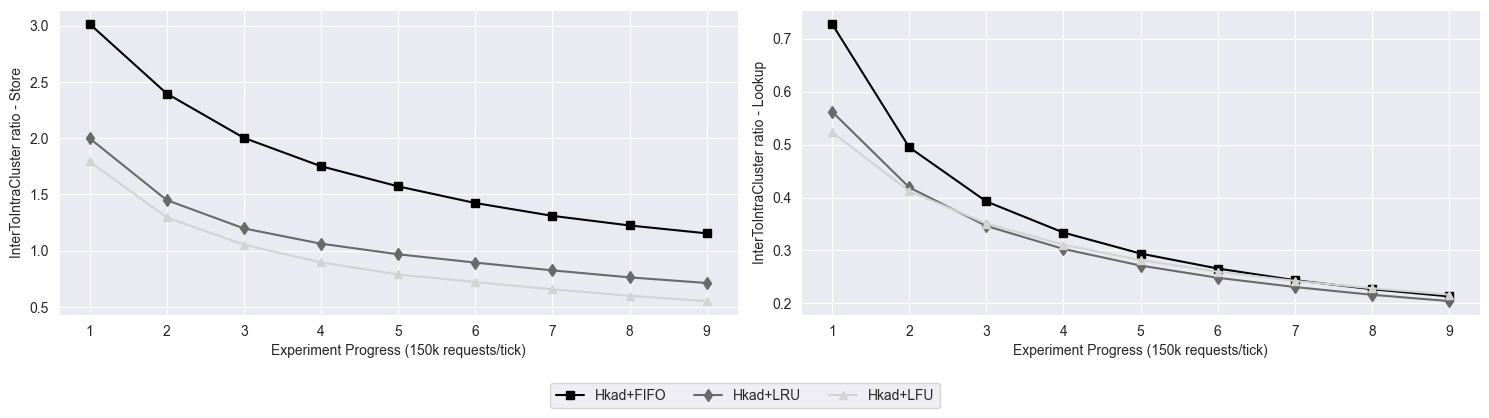

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4), sharex=True)

# 子图2：InterToIntraCluster Ratio - Store
axs[0].plot(hk_c['Tick'], hk_c['InterToIntraCluster Ratio - Store'], 's-', color='black', label='Hkad+FIFO')
axs[0].plot(LRU['Tick'], LRU['InterToIntraCluster Ratio - Store'], 'd-', color='dimgray', label='Hkad+LRU')
axs[0].plot(LFU['Tick'], LFU['InterToIntraCluster Ratio - Store'], '^-', color='lightgray', label='Hkad+LFU')
axs[0].set_ylabel('InterToIntraCluster ratio - Store')
axs[0].set_xlabel('Experiment Progress (150k requests/tick)')

# 子图3：InterToIntraCluster Ratio - Lookup
axs[1].plot(hk_c['Tick'], hk_c['InterToIntraCluster Ratio - Lookup'], 's-', color='black', label='Hkad+FIFO')
axs[1].plot(LRU['Tick'], LRU['InterToIntraCluster Ratio - Lookup'], 'd-', color='dimgray', label='Hkad+LRU')
axs[1].plot(LFU['Tick'], LFU['InterToIntraCluster Ratio - Lookup'], '^-', color='lightgray', label='Hkad+LFU')
axs[1].set_ylabel('InterToIntraCluster ratio - Lookup')
axs[1].set_xlabel('Experiment Progress (150k requests/tick)')

# 设置统一图例
lines_labels = axs[0].get_lines()
labels = [line.get_label() for line in lines_labels]
fig.legend(lines_labels, labels, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05))

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)
plt.show()
